# 🎓 Complete Guide to Building Machine Learning Models

Welcome! In this tutorial, you'll learn how to build, train, and evaluate machine learning models from scratch.

## What You'll Learn:
1. Data preparation and exploration
2. Classification models (predicting categories)
3. Regression models (predicting numbers)
4. Clustering models (finding patterns)
5. Model evaluation and selection

Let's get started! 🚀

## 📦 Step 1: Import Required Libraries

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor

# Clustering Models
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_classification, make_regression, make_blobs

# Settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
np.random.seed(42)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 📊 Part 1: Classification Models

Classification is used when you want to predict **categories** (e.g., spam/not spam, disease/healthy).

### Example: Customer Purchase Prediction

In [2]:
# Generate sample classification dataset
# Let's predict whether a customer will make a purchase based on age and income
X_class, y_class = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=42
)

# Create a DataFrame for better understanding
df_class = pd.DataFrame(X_class, columns=['Age (normalized)', 'Income (normalized)'])
df_class['Purchase'] = y_class

print("Dataset shape:", df_class.shape)
print("\nFirst few rows:")
print(df_class.head())
print("\nClass distribution:")
print(df_class['Purchase'].value_counts())

Dataset shape: (1000, 3)

First few rows:
   Age (normalized)  Income (normalized)  Purchase
0         -0.999102            -0.663860         1
1          1.246686             1.153597         1
2          0.962777             0.859397         1
3         -2.957441             2.033645         1
4          1.141165             1.059449         1

Class distribution:
Purchase
1    502
0    498
Name: count, dtype: int64


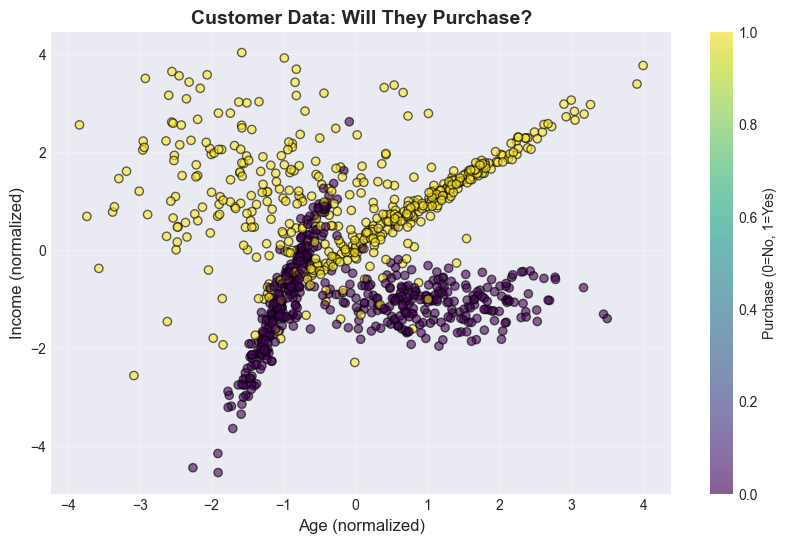

In [3]:
# Visualize the data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_class['Age (normalized)'], 
                     df_class['Income (normalized)'], 
                     c=df_class['Purchase'], 
                     cmap='viridis', 
                     alpha=0.6,
                     edgecolors='black')
plt.xlabel('Age (normalized)', fontsize=12)
plt.ylabel('Income (normalized)', fontsize=12)
plt.title('Customer Data: Will They Purchase?', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Purchase (0=No, 1=Yes)')
plt.grid(True, alpha=0.3)
plt.show()

### 🔄 Train-Test Split

We split data into:
- **Training set (80%)**: To teach the model
- **Testing set (20%)**: To evaluate how well it learned

In [4]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 800
Testing samples: 200


### 🤖 Model 1: Logistic Regression

Simple but effective for binary classification.

In [5]:
# Create and train the model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_lr = log_reg.predict(X_test)

# Evaluate
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 88.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       101
           1       0.88      0.88      0.88        99

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



### 🌳 Model 2: Decision Tree

Makes decisions like a flowchart.

In [6]:
# Create and train
dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_clf.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2%}")

Decision Tree Accuracy: 94.00%


### 🌲 Model 3: Random Forest

Combines multiple decision trees for better predictions.

In [7]:
# Create and train
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2%}")

Random Forest Accuracy: 95.50%


### 📊 Compare Classification Models

                 Model  Accuracy
0  Logistic Regression     0.880
1        Decision Tree     0.940
2        Random Forest     0.955


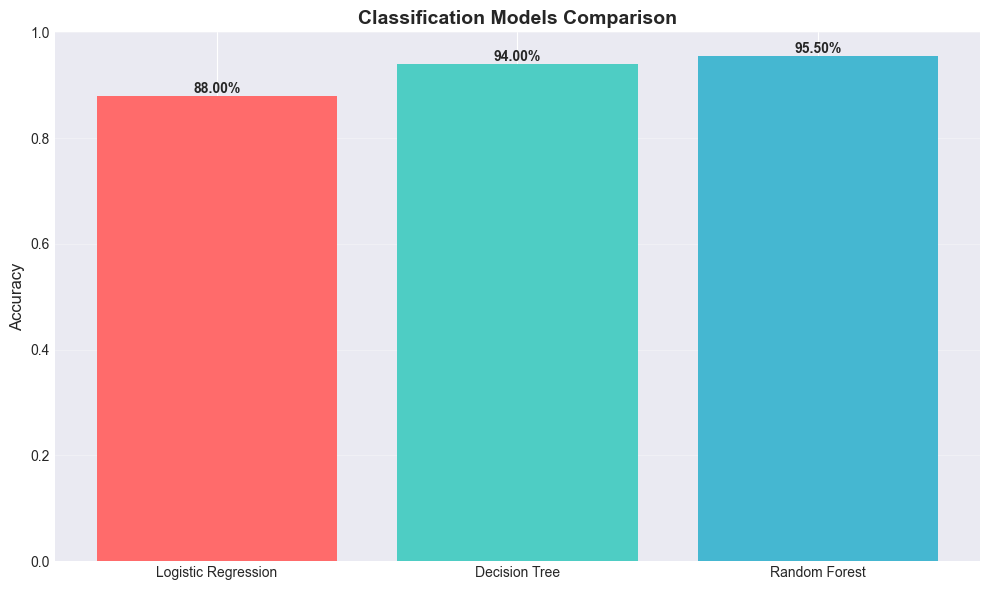

In [8]:
# Compare all models
models_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_rf]
})

print(models_comparison)

# Visualize comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(models_comparison['Model'], models_comparison['Accuracy'], 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.ylabel('Accuracy', fontsize=12)
plt.title('Classification Models Comparison', fontsize=14, fontweight='bold')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2%}',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### 🎯 Confusion Matrix

Shows where the model gets confused.

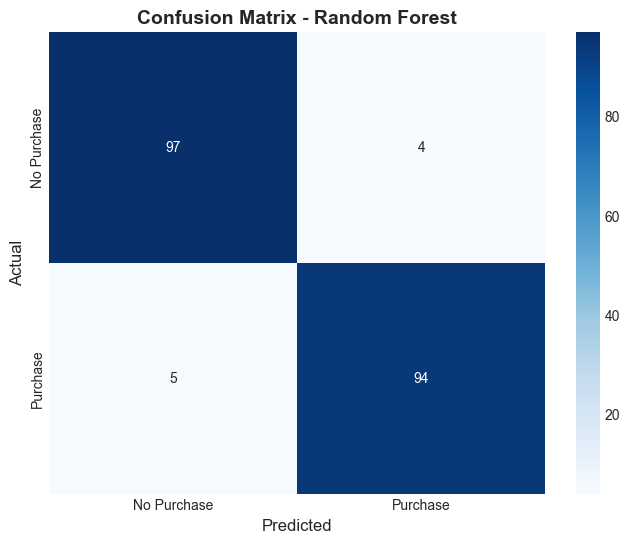


True Negatives: 97
False Positives: 4
False Negatives: 5
True Positives: 94


In [9]:
# Confusion matrix for best model (Random Forest)
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Purchase', 'Purchase'],
            yticklabels=['No Purchase', 'Purchase'])
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.title('Confusion Matrix - Random Forest', fontsize=14, fontweight='bold')
plt.show()

print(f"\nTrue Negatives: {cm[0][0]}")
print(f"False Positives: {cm[0][1]}")
print(f"False Negatives: {cm[1][0]}")
print(f"True Positives: {cm[1][1]}")

## 📈 Part 2: Regression Models

Regression is used to predict **continuous values** (e.g., prices, temperatures, sales).

### Example: House Price Prediction

In [11]:
# Generate sample regression dataset
X_reg, y_reg = make_regression(
    n_samples=500,
    n_features=1,
    noise=20,
    random_state=42
)

# Create DataFrame
df_reg = pd.DataFrame(X_reg, columns=['House Size (sq ft)'])
df_reg['Price ($1000s)'] = y_reg

print("Dataset shape:", df_reg.shape)
print("\nFirst few rows:")
print(df_reg.head())
print("\nStatistics:")
print(df_reg.describe())

Dataset shape: (500, 2)

First few rows:
   House Size (sq ft)  Price ($1000s)
0           -0.808298      -42.598138
1            0.096996        2.950676
2            0.473238       23.553604
3           -1.478522     -109.967066
4           -0.385314      -22.211116

Statistics:
       House Size (sq ft)  Price ($1000s)
count          500.000000      500.000000
mean             0.006838       -0.349542
std              0.981253       65.375516
min             -3.241267     -231.114665
25%             -0.700307      -46.140730
50%              0.012797       -1.880492
75%              0.636783       36.454147
max              3.852731      248.235405


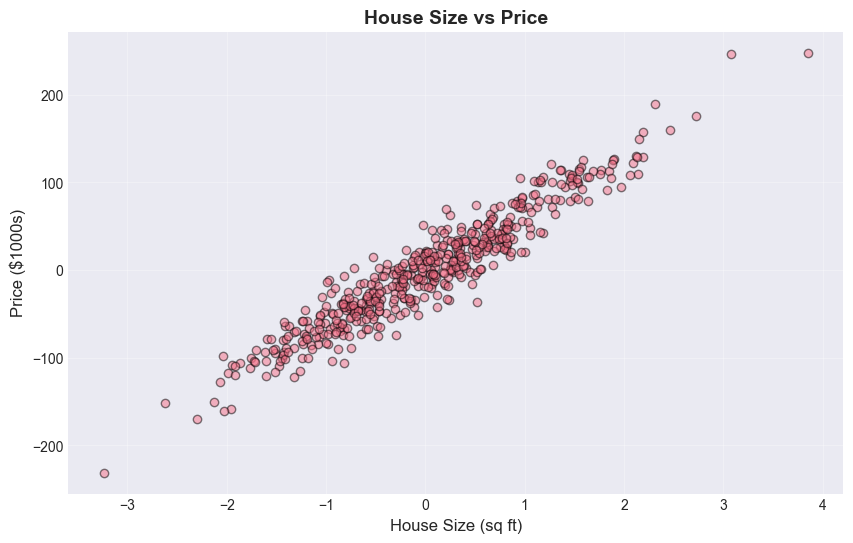

In [12]:
# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(df_reg['House Size (sq ft)'], df_reg['Price ($1000s)'], 
           alpha=0.5, edgecolors='black')
plt.xlabel('House Size (sq ft)', fontsize=12)
plt.ylabel('Price ($1000s)', fontsize=12)
plt.title('House Size vs Price', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

In [13]:
# Split the data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print(f"Training samples: {len(X_train_reg)}")
print(f"Testing samples: {len(X_test_reg)}")

Training samples: 400
Testing samples: 100


### 📏 Linear Regression

Fits a straight line through the data.

In [14]:
# Create and train
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)

# Predict
y_pred_lin = lin_reg.predict(X_test_reg)

# Evaluate
mse_lin = mean_squared_error(y_test_reg, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test_reg, y_pred_lin)
mae_lin = mean_absolute_error(y_test_reg, y_pred_lin)

print(f"Linear Regression Metrics:")
print(f"  R² Score: {r2_lin:.4f} (closer to 1 is better)")
print(f"  RMSE: {rmse_lin:.2f}")
print(f"  MAE: {mae_lin:.2f}")

Linear Regression Metrics:
  R² Score: 0.9025 (closer to 1 is better)
  RMSE: 19.25
  MAE: 15.40


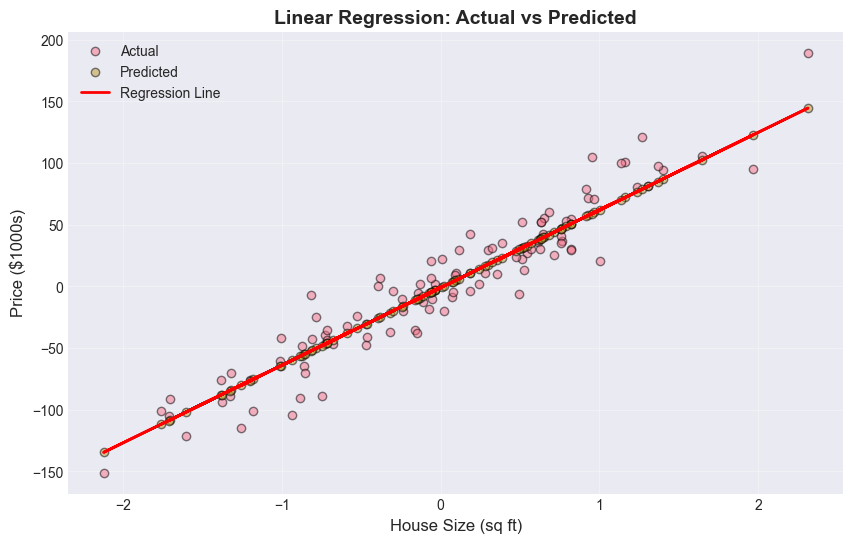

In [15]:
# Visualize predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_test_reg, y_test_reg, alpha=0.5, label='Actual', edgecolors='black')
plt.scatter(X_test_reg, y_pred_lin, alpha=0.5, label='Predicted', edgecolors='black')
plt.plot(X_test_reg, y_pred_lin, color='red', linewidth=2, label='Regression Line')
plt.xlabel('House Size (sq ft)', fontsize=12)
plt.ylabel('Price ($1000s)', fontsize=12)
plt.title('Linear Regression: Actual vs Predicted', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 🌳 Decision Tree Regressor

In [16]:
# Create and train
dt_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_reg.fit(X_train_reg, y_train_reg)

# Predict and evaluate
y_pred_dt_reg = dt_reg.predict(X_test_reg)
r2_dt = r2_score(y_test_reg, y_pred_dt_reg)
rmse_dt = np.sqrt(mean_squared_error(y_test_reg, y_pred_dt_reg))

print(f"Decision Tree Regressor Metrics:")
print(f"  R² Score: {r2_dt:.4f}")
print(f"  RMSE: {rmse_dt:.2f}")

Decision Tree Regressor Metrics:
  R² Score: 0.8948
  RMSE: 19.99


### 📊 Compare Regression Models

               Model  R² Score       RMSE
0  Linear Regression  0.902469  19.248750
1      Decision Tree  0.894815  19.989794


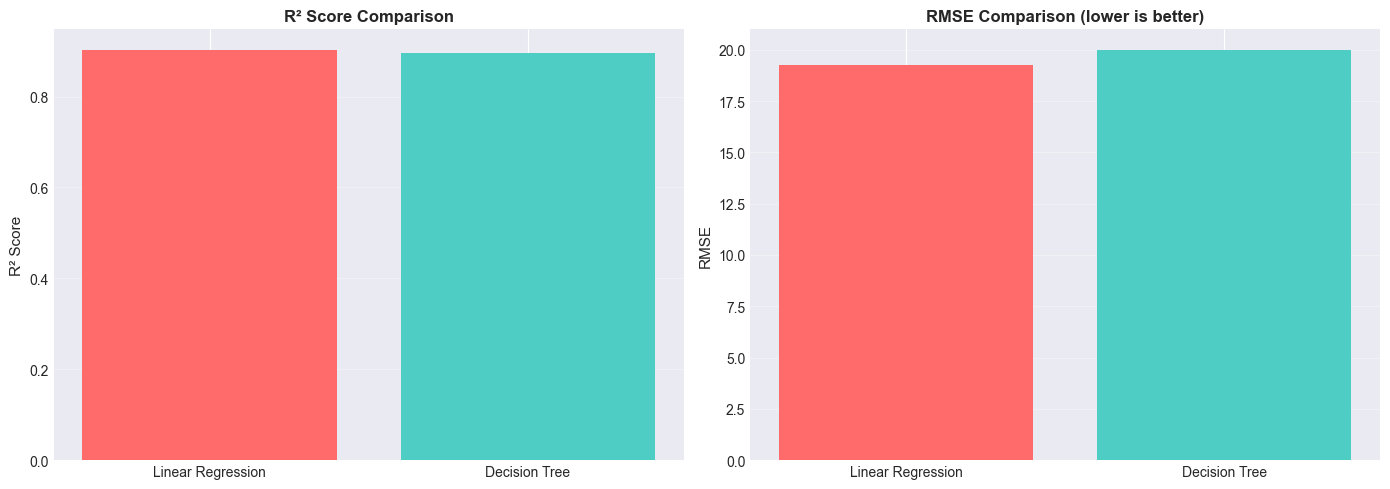

In [17]:
# Create comparison DataFrame
reg_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree'],
    'R² Score': [r2_lin, r2_dt],
    'RMSE': [rmse_lin, rmse_dt]
})

print(reg_comparison)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# R² Score comparison
axes[0].bar(reg_comparison['Model'], reg_comparison['R² Score'], 
            color=['#FF6B6B', '#4ECDC4'])
axes[0].set_ylabel('R² Score', fontsize=11)
axes[0].set_title('R² Score Comparison', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# RMSE comparison
axes[1].bar(reg_comparison['Model'], reg_comparison['RMSE'], 
            color=['#FF6B6B', '#4ECDC4'])
axes[1].set_ylabel('RMSE', fontsize=11)
axes[1].set_title('RMSE Comparison (lower is better)', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 🎨 Part 3: Clustering Models

Clustering finds **natural groups** in data without labels.

### Example: Customer Segmentation

In [18]:
# Generate sample clustering dataset
X_cluster, y_cluster = make_blobs(
    n_samples=300,
    n_features=2,
    centers=3,
    cluster_std=1.0,
    random_state=42
)

df_cluster = pd.DataFrame(X_cluster, columns=['Annual Income', 'Spending Score'])

print("Dataset shape:", df_cluster.shape)
print("\nFirst few rows:")
print(df_cluster.head())

Dataset shape: (300, 2)

First few rows:
   Annual Income  Spending Score
0      -7.338988       -7.729954
1      -7.740041       -7.264665
2      -1.686653        7.793442
3       4.422198        3.071947
4      -8.917752       -7.888196


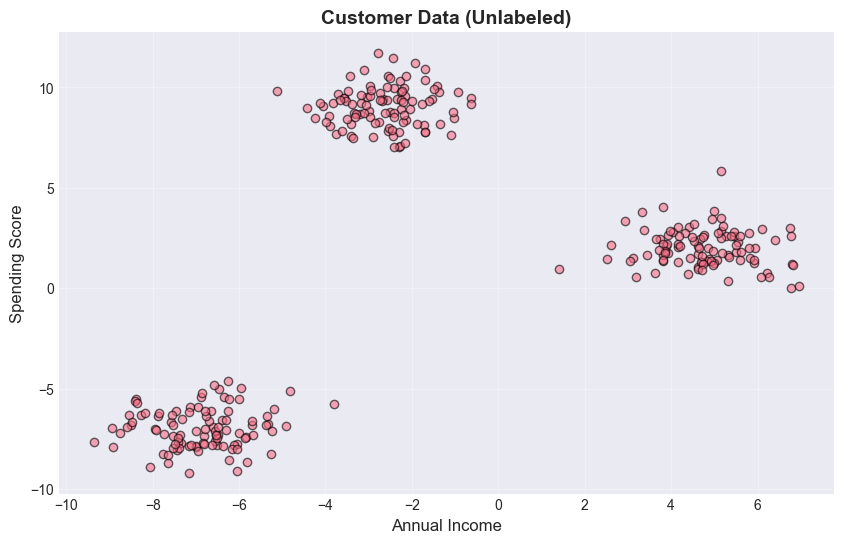

In [19]:
# Visualize unlabeled data
plt.figure(figsize=(10, 6))
plt.scatter(df_cluster['Annual Income'], df_cluster['Spending Score'], 
           alpha=0.6, edgecolors='black')
plt.xlabel('Annual Income', fontsize=12)
plt.ylabel('Spending Score', fontsize=12)
plt.title('Customer Data (Unlabeled)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

### 🎯 K-Means Clustering

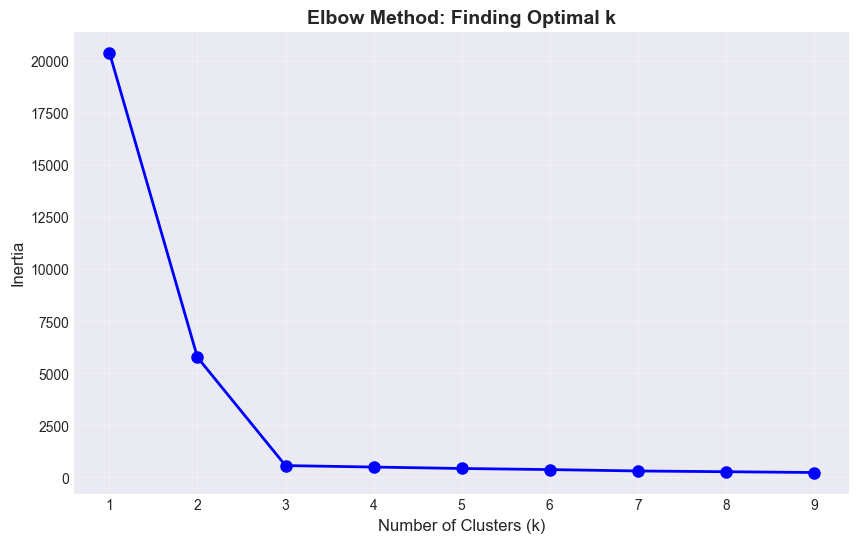

Look for the 'elbow' point where the curve starts to flatten.


In [20]:
# Find optimal number of clusters using Elbow Method
inertias = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster)
    inertias.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method: Finding Optimal k', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

print("Look for the 'elbow' point where the curve starts to flatten.")

In [21]:
# Apply K-Means with optimal k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_cluster)

# Add cluster labels to DataFrame
df_cluster['Cluster'] = clusters

print("Cluster distribution:")
print(df_cluster['Cluster'].value_counts().sort_index())

Cluster distribution:
Cluster
0    100
1    100
2    100
Name: count, dtype: int64


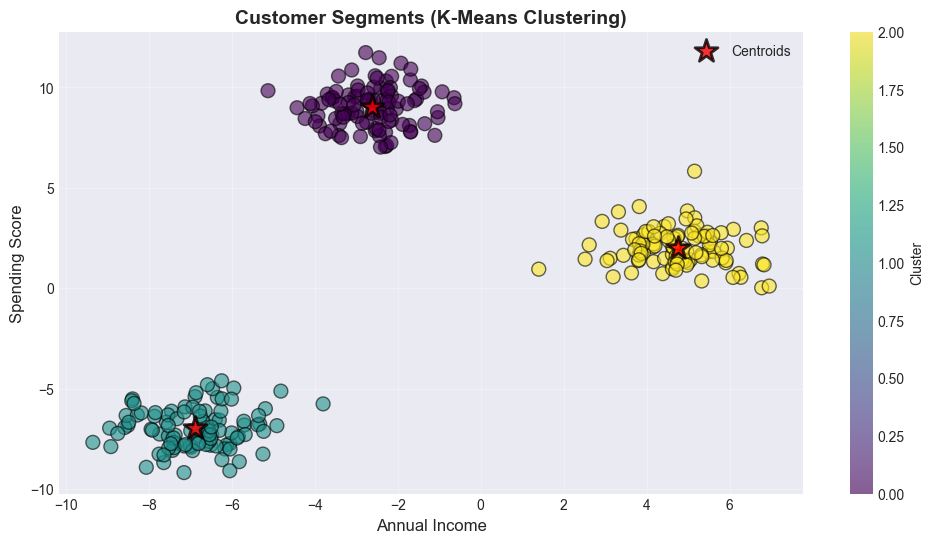


✅ Successfully identified 3 customer segments!


In [22]:
# Visualize clusters
plt.figure(figsize=(12, 6))

scatter = plt.scatter(df_cluster['Annual Income'], 
                     df_cluster['Spending Score'],
                     c=df_cluster['Cluster'],
                     cmap='viridis',
                     s=100,
                     alpha=0.6,
                     edgecolors='black')

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], 
           c='red', s=300, alpha=0.8, 
           marker='*', edgecolors='black', linewidth=2,
           label='Centroids')

plt.xlabel('Annual Income', fontsize=12)
plt.ylabel('Spending Score', fontsize=12)
plt.title('Customer Segments (K-Means Clustering)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n✅ Successfully identified 3 customer segments!")

## 🔄 Part 4: Cross-Validation

Cross-validation gives a more reliable estimate of model performance.

In [23]:
# Let's use our classification data
models_cv = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(random_state=42)
}

cv_results = []

for name, model in models_cv.items():
    # 5-fold cross-validation
    scores = cross_val_score(model, X_class, y_class, cv=5, scoring='accuracy')
    cv_results.append({
        'Model': name,
        'Mean Accuracy': scores.mean(),
        'Std Dev': scores.std()
    })
    print(f"{name}:")
    print(f"  Accuracy: {scores.mean():.2%} (+/- {scores.std():.2%})")
    print()

Logistic Regression:
  Accuracy: 86.30% (+/- 1.29%)

Decision Tree:
  Accuracy: 89.90% (+/- 1.24%)

Random Forest:
  Accuracy: 92.00% (+/- 1.14%)

KNN:
  Accuracy: 92.20% (+/- 1.47%)

SVM:
  Accuracy: 88.50% (+/- 2.41%)

Random Forest:
  Accuracy: 92.00% (+/- 1.14%)

KNN:
  Accuracy: 92.20% (+/- 1.47%)

SVM:
  Accuracy: 88.50% (+/- 2.41%)



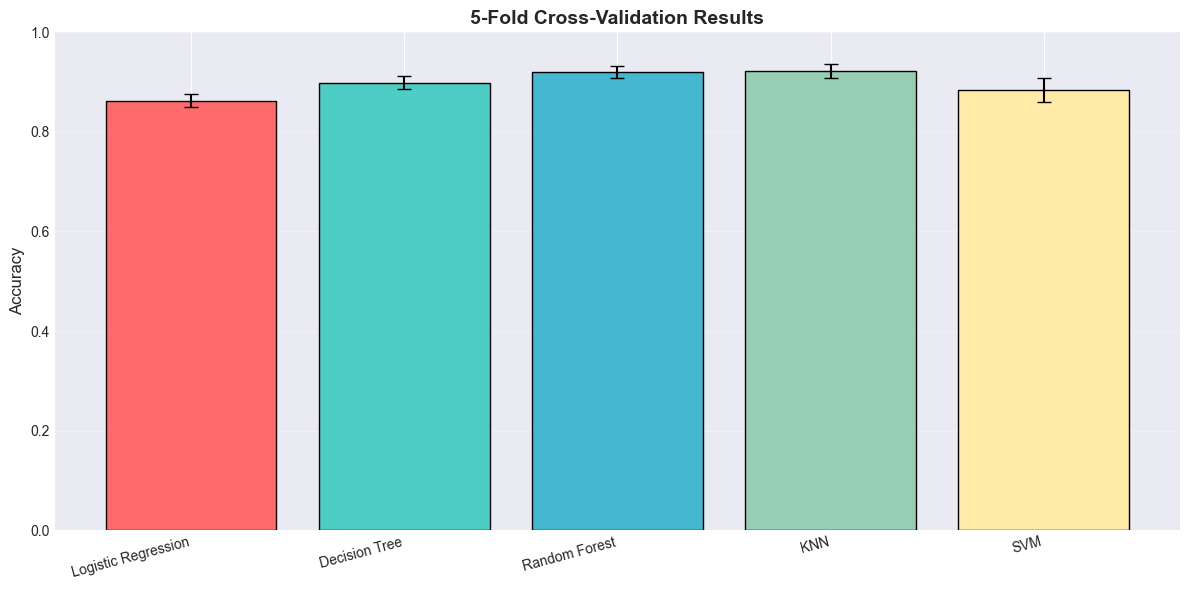


Best model based on cross-validation:
KNN: 92.20%


In [24]:
# Visualize cross-validation results
cv_df = pd.DataFrame(cv_results)

plt.figure(figsize=(12, 6))
x_pos = np.arange(len(cv_df))
plt.bar(x_pos, cv_df['Mean Accuracy'], 
        yerr=cv_df['Std Dev'], 
        capsize=5,
        color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'],
        edgecolor='black')
plt.xticks(x_pos, cv_df['Model'], rotation=15, ha='right')
plt.ylabel('Accuracy', fontsize=12)
plt.title('5-Fold Cross-Validation Results', fontsize=14, fontweight='bold')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nBest model based on cross-validation:")
best_idx = cv_df['Mean Accuracy'].idxmax()
print(f"{cv_df.loc[best_idx, 'Model']}: {cv_df.loc[best_idx, 'Mean Accuracy']:.2%}")

## 🎯 Part 5: Feature Importance

Understanding which features matter most.

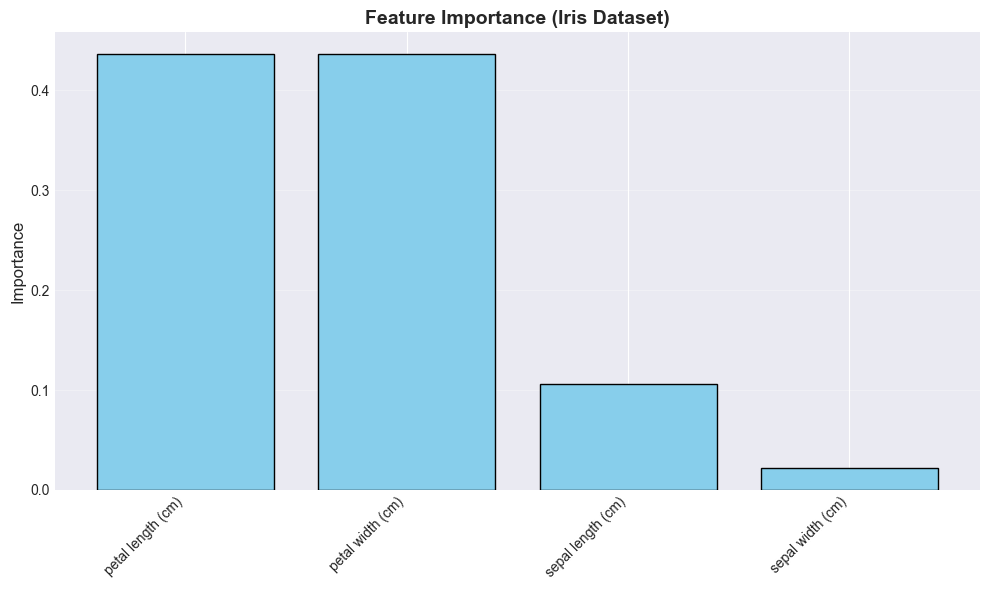

Feature Ranking:
1. petal length (cm): 0.4361
2. petal width (cm): 0.4361
3. sepal length (cm): 0.1061
4. sepal width (cm): 0.0217


In [25]:
# Create a dataset with named features
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
feature_names = iris.feature_names

# Train a Random Forest
rf_iris = RandomForestClassifier(n_estimators=100, random_state=42)
rf_iris.fit(X_iris, y_iris)

# Get feature importances
importances = rf_iris.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(X_iris.shape[1]), importances[indices], 
        color='skyblue', edgecolor='black')
plt.xticks(range(X_iris.shape[1]), 
          [feature_names[i] for i in indices], 
          rotation=45, ha='right')
plt.ylabel('Importance', fontsize=12)
plt.title('Feature Importance (Iris Dataset)', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Feature Ranking:")
for i, idx in enumerate(indices):
    print(f"{i+1}. {feature_names[idx]}: {importances[idx]:.4f}")

## 📝 Summary & Key Takeaways

### What You've Learned:

1. **Classification Models**
   - Logistic Regression: Simple, fast, interpretable
   - Decision Trees: Easy to understand, can overfit
   - Random Forest: More accurate, less interpretable
   - SVM & KNN: Different approaches with their own strengths

2. **Regression Models**
   - Linear Regression: Best for linear relationships
   - Decision Tree Regressor: Can capture non-linear patterns
   
3. **Clustering**
   - K-Means: Find natural groups in data
   - Elbow method: Determine optimal number of clusters

4. **Model Evaluation**
   - Train/Test Split: Basic validation
   - Cross-Validation: More robust evaluation
   - Multiple metrics: Accuracy, R², RMSE, MAE

5. **Best Practices**
   - Always split your data
   - Use cross-validation for reliable results
   - Compare multiple models
   - Understand feature importance
   - Visualize your results

### Next Steps:
- Try with your own datasets
- Experiment with hyperparameter tuning
- Learn about feature engineering
- Explore deep learning for complex problems

Happy Learning! 🎉

## 🏋️ Practice Exercises

Try these on your own:

1. **Modify hyperparameters**: Change `max_depth` in Decision Trees and see how it affects accuracy
2. **Try different splits**: Use 70-30 or 60-40 train-test splits
3. **Add more features**: Generate datasets with more features and see how models perform
4. **Real datasets**: Try with sklearn's built-in datasets (wine, breast_cancer, diabetes)
5. **Ensemble methods**: Combine multiple models for better predictions